# Heart disease analysis

### Progetto di Data Mining Calò Federico 678191


Dataset link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')

Visualizzazione delle prime 5 righe del dataset

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- age: età
- sex: sesso
- cp (cheat pain type):
    - 0: typical angina
    - 1: atypical angina
    - 2: non anginal pain
    - 3: asymptomatic
- trestbps: resting blood pressure ( in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl -> 1: true 0: false
- restecg: resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inverions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probalbe or definite left ventricular hypertrophy
 - thalach: maximum heart rate archieved
 - exang: exercise induced angina (1: true, 0: false)
 - oldpeak = ST depression induced by excercise relative to rest
 - slope: the slope of the peak exercise ST segment:
     - 1: upsloping
     - 2: flat
     - 3: downsloping
 - ca: number of major vessels (0-3) colored by flourosopy
 - thal: 3 = normal, 6 = fixed defect, 7 = reversable defect
 - target: 0 = less chance of heart attack, 1 = more chance of heart attack
    
    

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Verifichiamo la presenza di null values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Verifichiamo la presenza di dati duplicati

In [6]:
data_dup = data.duplicated().any()
print(data_dup)

True


In [7]:
data = data.drop_duplicates()

Creiamo la matrice di correlazione tra diverse feature

In [8]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

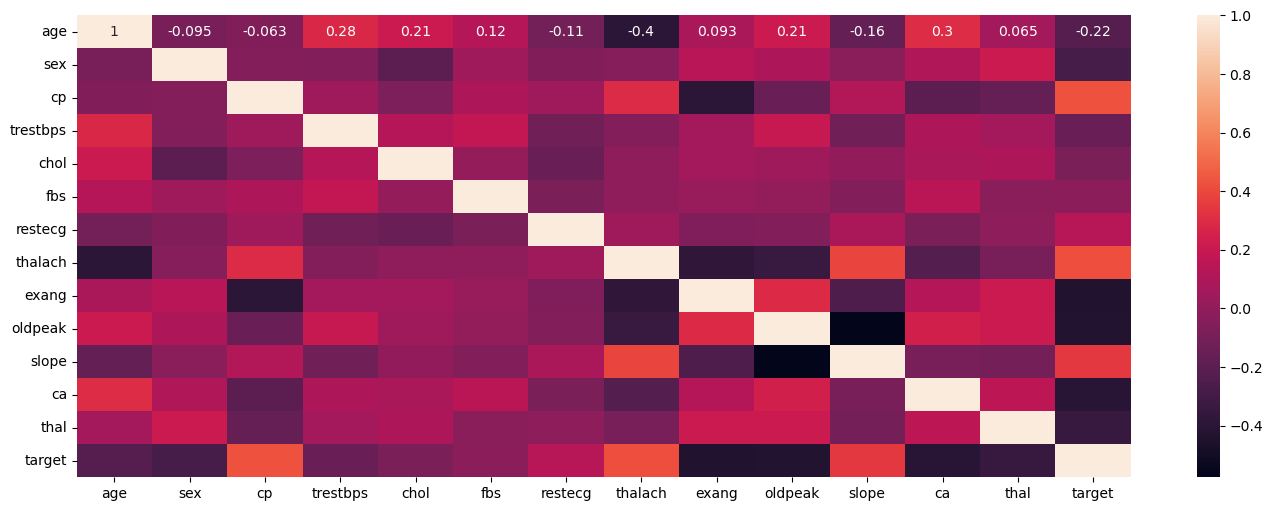

In [9]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

Quante persone hanno la cardiopatia?

In [10]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x231750a06d0>,
 [Text(0, 0, 'Donne'), Text(1, 0, 'Uomini')])

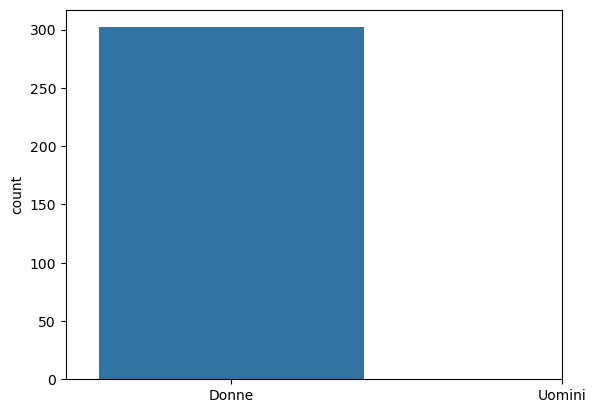

In [11]:
sns.countplot(data['target'])
plt.xticks([0,1],['Donne','Uomini'])

Separiamo il dataset per il genere

In [12]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x231751d8650>,
 [Text(0, 0, 'Donne'), Text(1, 0, 'Uomini')])

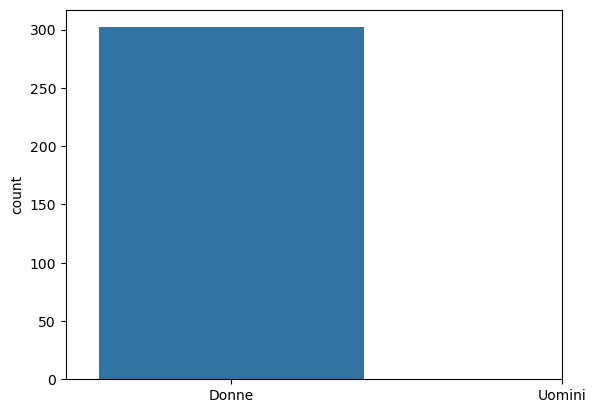

In [13]:
sns.countplot(data['sex'])
plt.xticks([0,1],['Donne','Uomini'])

Distribuzione di genere in relazione alla variabile target

AttributeError: 'numpy.int64' object has no attribute 'startswith'

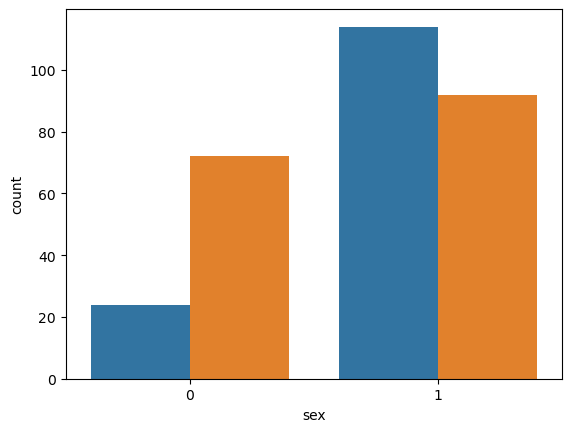

In [14]:
sns.countplot(x='sex',hue="target",data=data)
plt.xticks([1,0],['Uomini','Donne'])
plt.legend(labels=['No-Disease','Disease'])

Nel datase sono presenti più uomini che donne. Adesso vediamo la distribuzione dell'età.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


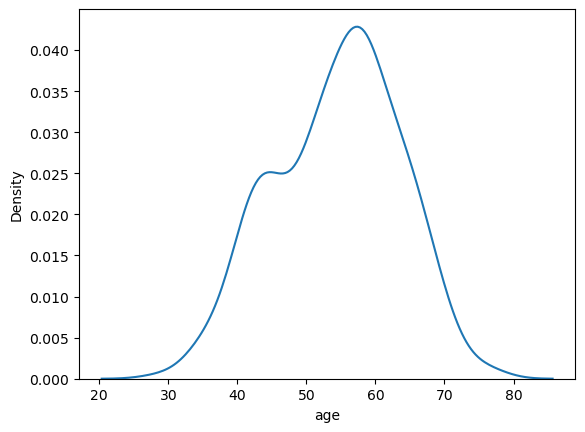

In [18]:
sns.kdeplot(data['age'])
plt.show()

Verifichiamo il vari tipi di Chest Pain